### Install pandas, numpy, matplotlib, scikit-learn 

In [ ]:

%pip install pandas numpy matplotlib scikit-learn
print("All libaries are installed")

### Import data and showing it of

In [ ]:

import pandas as pd

#Read data csv file
%cd "../data"
df = pd.read_csv('winequality-red.csv')

print("-" * 60 + "\nShow the first 5 rows:\n")
print(df.head())

print("-" * 60 + "\nShow rows and columns:\n(Rows, Columns)\n")
print(df.shape)

print("-" * 60 + "\nShow all the columns:\n")
df.columns

print("-" * 60 + "\nShow a description of the data:\n")
print(df.describe())

### Check for NaN values


In [ ]:
check_nans=df.isna().sum()
print(check_nans)

### Find and delete duplicates


In [ ]:
print("-" * 60 + "\nLooking for duplicates:\n")
dups=df.duplicated()
print(dups)

df=df.drop_duplicates()

print("-" * 60 + "\ndeleting duplicates:\n")
dropted_dups=df.duplicated()
print(dropted_dups)

### Finding outliers and deleting them


In [ ]:
print("-" * 60 + "\nFinding and deleting outliers:\n")
print(df.describe())
for col in df.columns:
    Q1 = df[f"{col}"].quantile(0.25)
    Q3 = df[f"{col}"].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # print(f"Debug:\ncol: {col} --- IQR: {IQR} --- low: {lower_bound} --- high: {upper_bound}")

    df = df[(df[f"{col}"] >= lower_bound) & (df[f"{col}"] <= upper_bound)]

print("-" * 60 + "\nafter outlier filtering:\n")
print(df.describe())

### Show data with bar chart

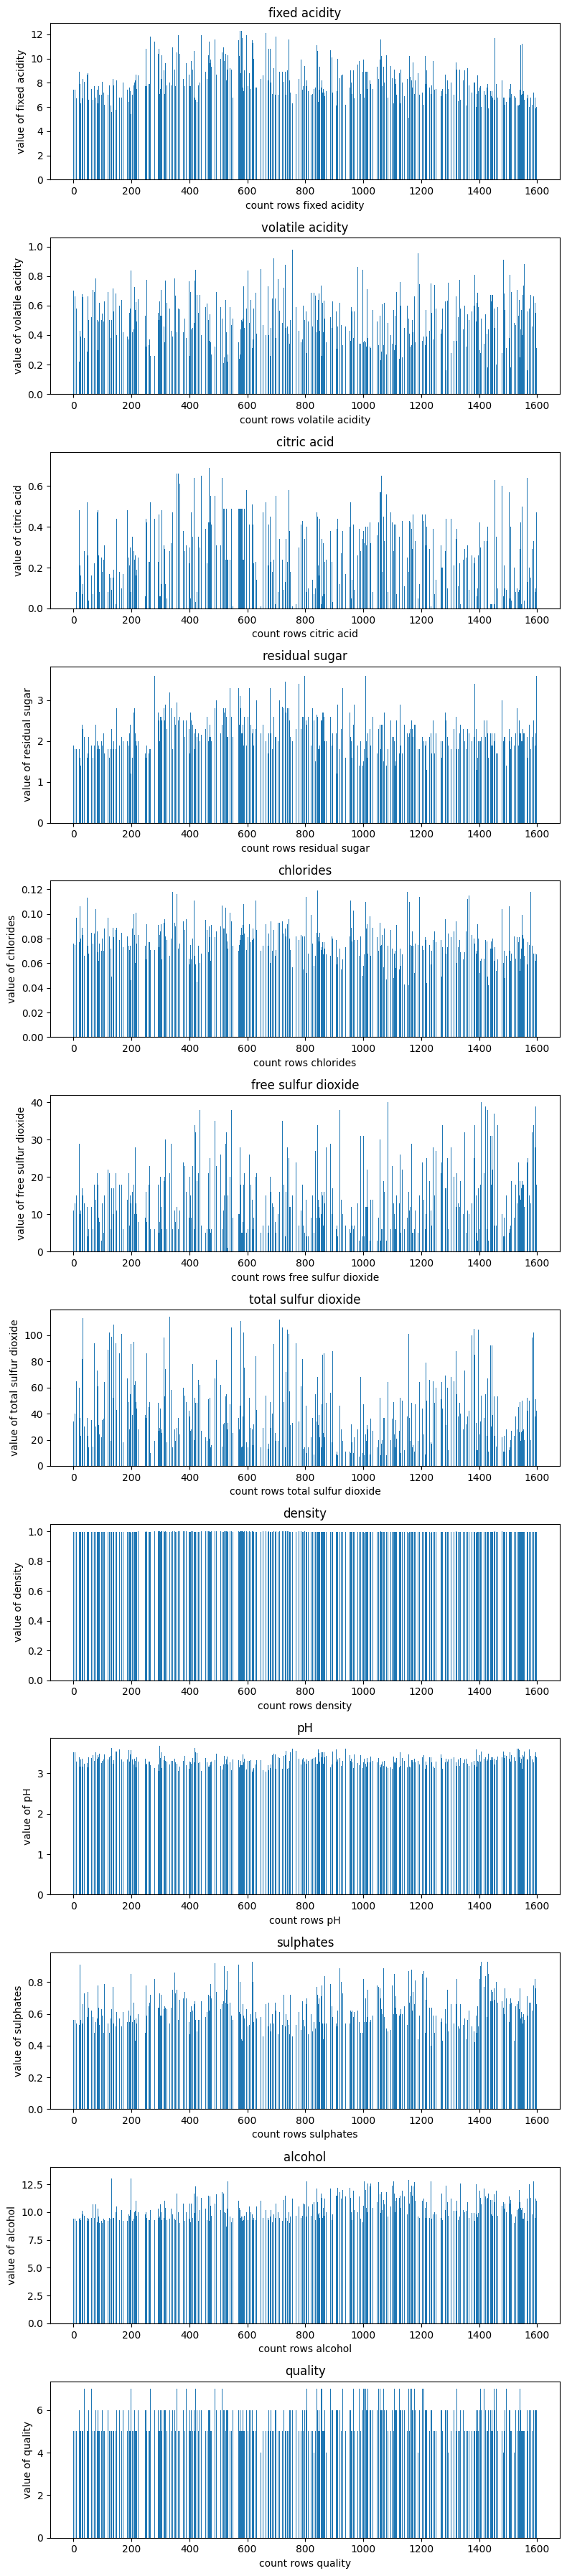

In [166]:
import matplotlib.pyplot as plt

def bar_subplots(dataFrame, columns):
    n = len(columns)
    fig, axes = plt.subplots(n, 1, figsize=(8, 3*n))

    for ax, col in zip(axes, columns):
        ax.bar(dataFrame.index, dataFrame[col])
        ax.set_title(col)
        ax.set_xlabel(f"count rows {col}")
        ax.set_ylabel(f"value of {col}")

    plt.tight_layout()
    plt.show()

bar_subplots(df, df.columns)


### show data with histogram chart


In [ ]:
import matplotlib.pyplot as plt

def hist_subplots(df, columns):
    n = len(columns)
    fig, axes = plt.subplots(n, 1, figsize=(8, 3*n))
    colors = ['red','blue','green','orange','purple','brown','orange','gray','cyan','magenta','yellow','black']
    for ax, col,color in zip(axes, columns,colors):
        ax.hist(df[col],bins=7, edgecolor='black', color=color, alpha=0.7)
        ax.set_title(col,color=color)
        ax.set_ylabel(f"count rows {col}")
        ax.set_xlabel(f"value of {col}")
        plt.tight_layout()
    plt.show()

hist_subplots(df, df.columns)


### Good quality wine data graphs

In [ ]:
good_quality_wine = df[(df['quality'] >= 6.5)]
good_quality_wine.reset_index(drop=True, inplace=True)

bar_subplots(good_quality_wine, good_quality_wine.columns)
hist_subplots(good_quality_wine, good_quality_wine.columns)



### Machine learning

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print(" libary imported!")

### Classifing

In [ ]:
#Create a category:
# 1 = high quality
# 0 = low quality
df_cls = df.copy()

df_cls["Good_quality"] = (df["quality"] > 6.5).astype(int)

print(df_cls[["quality", "Good_quality"]].head(20))

In [ ]:
df2 = df.loc[:,df.columns != 'quality']

x_clf =df2[df2.columns]
y_clf = df_cls[['Good_quality']]

X_train, X_test, Y_train, Y_test = train_test_split(
    x_clf, y_clf, test_size=0.2, random_state=42)

### Logical regression

In [ ]:
log_reg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver="liblinear"   
)
log_reg.fit(X_train, Y_train)

y_pred_log = log_reg.predict(X_test)

print("\nLogistisk regression")
print("Accuracy:", accuracy_score(Y_test, y_pred_log))

precision = precision_score(y_true=Y_test, y_pred=y_pred_log, average='micro')
recall = recall_score(y_true=Y_test, y_pred=y_pred_log, average='micro')

print("Precision:", precision)
print("Recall:", recall)

In [ ]:
cm_log = confusion_matrix(Y_test, y_pred_log)

sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Prediktion")
plt.ylabel("Sant värde")
plt.show()

### Random forest classifier

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_clf.fit(X_train, Y_train)

y_pred_rf_clf = rf_clf.predict(X_test)

print("\nRandom Forest Classifier")
print("Accuracy:", accuracy_score(Y_test, y_pred_rf_clf))
precision = precision_score(y_true=Y_test, y_pred=y_pred_rf_clf,average='micro')
recall = recall_score(y_true=Y_test, y_pred=y_pred_rf_clf, average='micro')

print("Precision:", precision)
print("Recall:", recall)

In [ ]:
cm_rf = confusion_matrix(Y_test, y_pred_rf_clf)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Prediktion")
plt.ylabel("Sant värde")
plt.show()

In [ ]:
importances = rf_clf.feature_importances_
features = x_clf.columns

df = pd.DataFrame({'Feature': features, 'Importance': importances})
print(df.sort_values('Importance', ascending=False))

### Recomendation

In [ ]:
for col in good_quality_wine.columns:
    meeean = good_quality_wine.head()[f"{col}"].mean()
    stttd = good_quality_wine.head()[f"{col}"].std()
    print(f"{col}: {meeean:.2f} +- {stttd:.2f}")